In [ ]:
##########################################################################
######     MODELLING OF COVID CASES IN INDIA      ########################
##########################################################################

In [64]:
#importing all the necesarry libraries
import numpy as np
import pandas as pd
import io
from google.colab import files
from google.colab import drive
from fbprophet import Prophet  
import plotly
import plotly.express as px

In [68]:
import warnings
warnings.filterwarnings("ignore")                # REMOVES WARNINGS FROM OUR CODE

In [8]:
import matplotlib.pyplot as plt  # for interactive plots and simple cases of programmatic plot generation
import seaborn as sns # for statistical graphics plotting and an amazing data visualisation library
colors=['#0C68C7','#3A6794','#00FAF3','#FA643C','#C71D12']
sns.set(palette=colors, style='white') #giving the colours to color palatte

In [87]:
####
# Uploading the csv file covid.csv (which contains no.of positive and negative samples)
uploaded = files.upload()
state_df = pd.read_csv(io.BytesIO(uploaded['Covid.csv']))
# Uploading the csv file which contains country data (state wise)
uploaded = files.upload()
country_df = pd.read_csv(io.BytesIO(uploaded['covid_19_india.csv']))
# Uploading the csv file which contains vaccination data (state wise)
uploaded = files.upload()
vaccine_df = pd.read_csv(io.BytesIO(uploaded['covid_vaccine_statewise.csv']))

Saving Covid.csv to Covid (1).csv


Saving covid_19_india.csv to covid_19_india (1).csv


Saving covid_vaccine_statewise.csv to covid_vaccine_statewise (1).csv


In [88]:
state_df.columns

Index(['Date', 'State', 'TotalSamples', 'Negative', 'Positive'], dtype='object')

In [89]:
# Data Cleaning
state_df['TotalSamples']=state_df['TotalSamples'].fillna(0)
state_df['TotalSamples']=state_df['TotalSamples'].astype('int')
state_df['Positive']=state_df['Positive'].fillna(0)
state_df['Positive']=state_df['Positive'].astype('int')
state_df['Negative']=state_df['Negative'].fillna(0)
#state_testing['Negative']=state_testing['Negative'].astype('int')

In [90]:
####
# Let's get an understanding of our data
# Let's print a snapshot of our state data frame
state_df.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403,1210,12
1,2020-04-24,Andaman and Nicobar Islands,2679,0,27
2,2020-04-27,Andaman and Nicobar Islands,2848,0,33
3,2020-05-01,Andaman and Nicobar Islands,3754,0,33
4,2020-05-16,Andaman and Nicobar Islands,6677,0,33


In [91]:
country_df.isnull().sum() # no null are there at present

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [92]:
country_df = country_df.drop(['Sno','ConfirmedIndianNational', 'ConfirmedForeignNational'], axis=1) # as they are not required

In [94]:
##### Let's look at the column headings of state data
country_df.columns

Index(['Date', 'Time', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed'], dtype='object')

In [95]:
# Data Cleaning for country_df
country_df['State/UnionTerritory']=country_df['State/UnionTerritory'].fillna(0)
country_df['Cured']=country_df['Cured'].fillna(0)
country_df['Cured']=country_df['Cured'].astype('int')
country_df['Deaths']=country_df['Deaths'].fillna(0)
country_df['Deaths']=country_df['Deaths'].astype('int')
country_df['Cured']=country_df['Cured'].fillna(0)
country_df['Cured']=country_df['Cured'].astype('int')

In [96]:
# Let's try print data corresponding to a particular state
state_df[state_df['State']=='Rajasthan'].head()

,Date,State,TotalSamples,Negative,Positive
11658,2020-04-07,Rajasthan,17638,16401,363
11659,2020-04-08,Rajasthan,17638,16401,363
11660,2020-04-09,Rajasthan,19107,17851,463
11661,2020-04-10,Rajasthan,22349,20698,561
11662,2020-04-11,Rajasthan,24857,22583,678


In [97]:
#copying the data toa df for easy use of it
df=country_df.copy()

In [98]:
#converting the Date feature to a year month date format
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d') #Using the panda feature and formatting it.
df.rename(columns={'State/UnionTerritory':'States'}, inplace=True) #Renaming as for our convinience

In [99]:
#Creating instances for the active cases, discharge rate, death rate and writing their formulas and adding them to data using pandas
df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])
df['Recovery_Rate'] = np.round((df['Cured']/df['Confirmed'])*100, decimals = 4)    # rounding of to 4 decimal places
df['Death_Rate'] = np.round((df['Deaths']/df['Confirmed'])*100, decimals = 4)      # rounding of to 4 decimal places
df.tail() # printing a sample of them

,Date,Time,States,Cured,Deaths,Confirmed,Active_cases,Recovery_Rate,Death_Rate
16845,2021-07-07,8:00 AM,Telangana,613124,3703,628282,11455,97.5874,0.5894
16846,2021-07-07,8:00 AM,Tripura,63964,701,68612,3947,93.2257,1.0217
16847,2021-07-07,8:00 AM,Uttarakhand,332006,7338,340882,1538,97.3962,2.1527
16848,2021-07-07,8:00 AM,Uttar Pradesh,1682130,22656,1706818,2032,98.5536,1.3274
16849,2021-07-07,8:00 AM,West Bengal,1472132,17834,1507241,17275,97.6706,1.1832


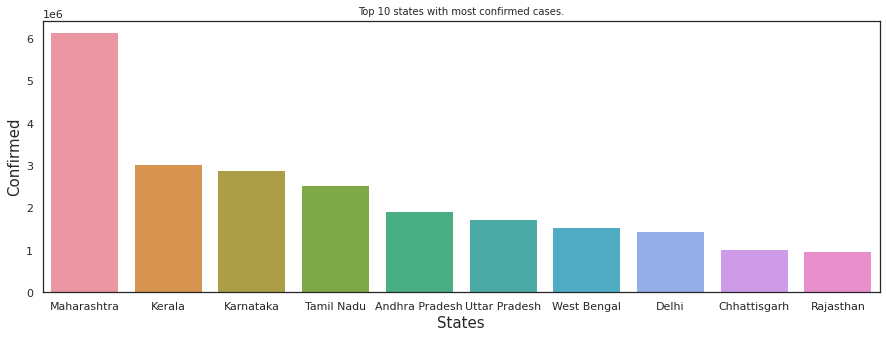

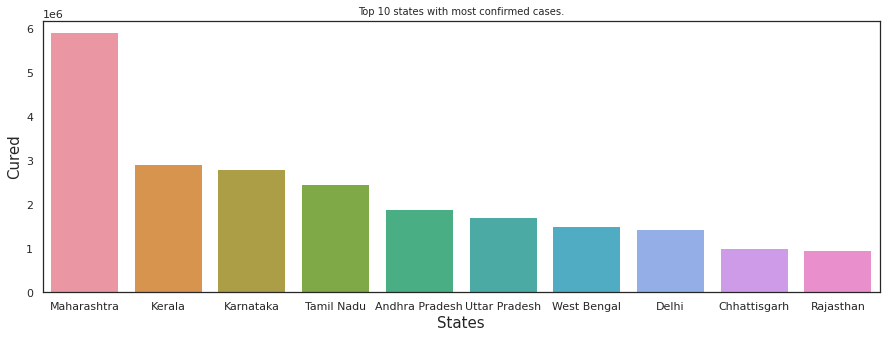

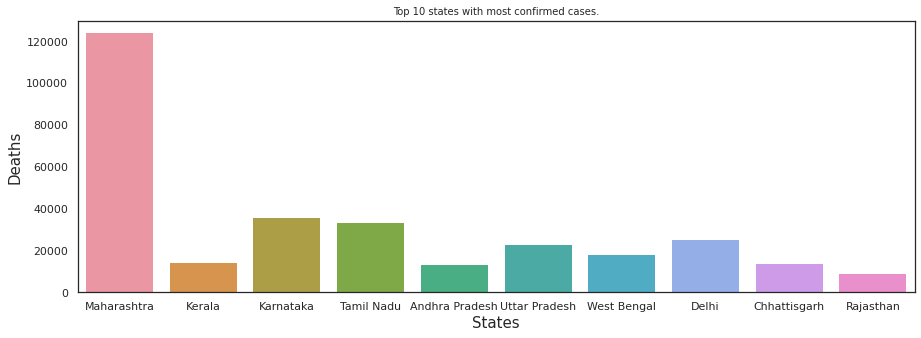

In [100]:
current = df[df.Date == '2021-07-07'] # Take the data of most recent date in the file
confirmed_cases = current.sort_values(by='Confirmed', ascending = False) # Arranging from high cases to low cases
max_confirmed_cases = confirmed_cases[:10] # Selecting top 10 States from the max_cases data

#plotting the data as a bar graph using sns for the top 10 states with most confirmed cases.
for feature in max_confirmed_cases [['Confirmed','Cured','Deaths']]:#looping over each feature
    fig=plt.figure(figsize=(15,5)) #giving the figure size
    plt.title("Top 10 states with most confirmed cases.", size=10) #giving the title to the plot
    ax=sns.barplot(data=max_confirmed_cases ,y=max_confirmed_cases [feature],x='States', linewidth=0, edgecolor='brown') #plotting the bar graph with sns by giving it the data of top cases
    plt.xlabel('States', size = 15) #xlabel
    plt.ylabel(feature, size = 15) #ylabel
plt.show()

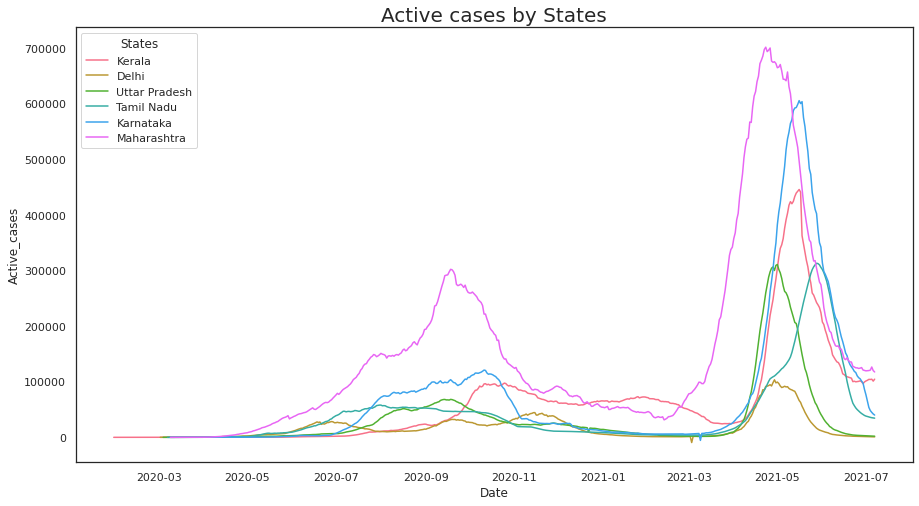

In [101]:
# Active cases in top 6 states during the period of time
fig=plt.figure(figsize=(15,8))
ax=sns.lineplot(data=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra','Uttar Pradesh','Karnataka'])],x='Date',y='Active_cases',hue='States')
ax.set_title("Active cases by States", size=20)
plt.show()

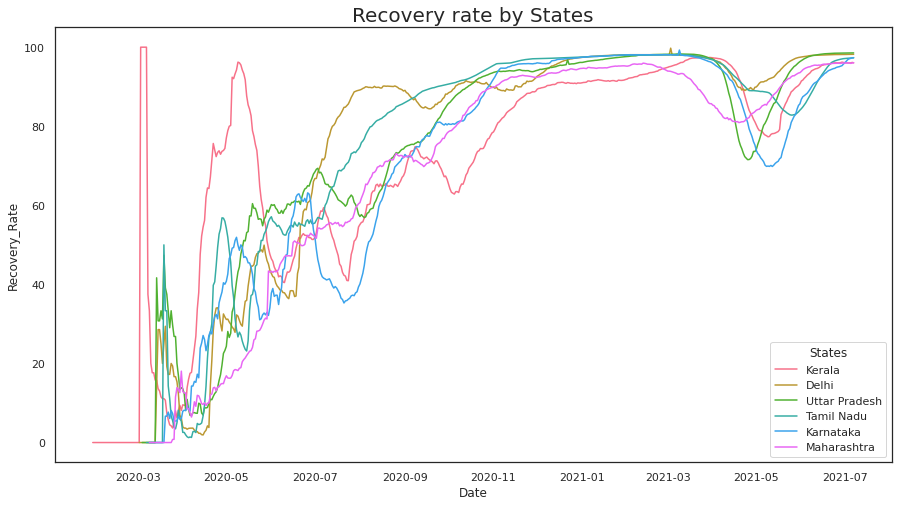

In [125]:
# Recovery_rate in top 6 states during the period of time
fig=plt.figure(figsize=(15,8))
ax=sns.lineplot(data=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra','Uttar Pradesh','Karnataka'])],x='Date',y='Recovery_Rate',hue='States')
ax.set_title("Recovery rate by States", size=20)
plt.show()

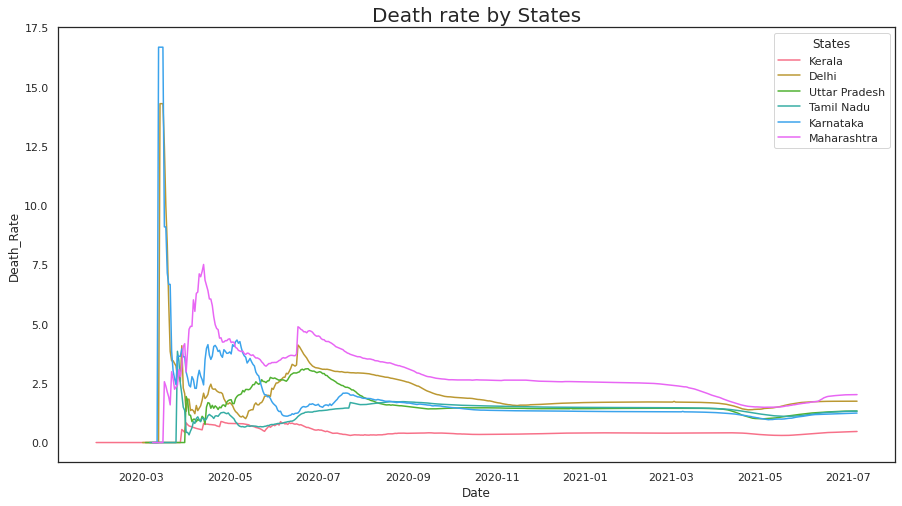

In [103]:
# Death_rate in top 6 states during the period of time
fig=plt.figure(figsize=(15,8))
ax=sns.lineplot(data=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra','Uttar Pradesh','Karnataka'])],x='Date',y='Death_Rate',hue='States')
ax.set_title("Death rate by States", size=20)
plt.show()

In [126]:
df['Date']= pd.to_datetime(df['Date']) #in the data converting the date into the date-time-year format as we have done above
data_20 = df[df['Date'].dt.year==2020] #considering the data for the year 2020 
data_21 = df[df['Date'].dt.year==2021] #considering the data for the year 2021

data_20['Month']=data_20['Date'].dt.month # accessing month from the above format for year 2020              
data_21['Month']=data_21['Date'].dt.month  # accessing month from the above format for year 2021 

#For the year 2020
# Creating the instances for the year 2020 for each month
data_confirm_20= data_20['Confirmed'].groupby(data_20['Month']).sum() #Total no.of confirmed cases in each month 
data_dis_20= data_20['Cured'].groupby(data_20['Month']).sum()     #Total no.of discharged cases in each month
data_death_20= data_20['Deaths'].groupby(data_20['Month']).sum()   #Total no.of Deaths in each month

#For the year 2021
# Creating the instances for the year 2020 for each month
data_confirm_21= data_21['Confirmed'].groupby(data_21['Month']).sum()#Total no.of confirmed cases in each month
data_dis_21= data_21['Cured'].groupby(data_21['Month']).sum()      #Total no.of discharged cases in each month
data_death_21= data_21['Deaths'].groupby(data_21['Month']).sum()  #Total no.of Deaths in each month

cols_20=[data_confirm_20,data_dis_20,data_death_20] #Taking that into array 
data_20=pd.concat(cols_20,axis=1)  #Make the data into a panda frame

cols_21=[data_confirm_21,data_dis_21,data_death_21] #Taking that into array 
data_21=pd.concat(cols_21,axis=1) #Make the data into a panda frame

#Year 2020    # create instances for 'death_rate and discharge_rate' for year 2020
data_20['recovery_rate_20'] = np.round((data_20['Cured']/data_20['Confirmed'])*100, decimals=4)     
data_20['death_rate_20'] = np.round((data_20['Deaths']/data_20['Confirmed'])*100, decimals=4)
data_20.reset_index(inplace=True) #setting the index
#Year 2021   # create instances for 'death_rate and discharge_rate' for year 2021
data_21['recovery_rate_21'] = np.round((data_21['Cured']/data_21['Confirmed'])*100, decimals=4)     
data_21['death_rate_21'] = np.round((data_21['Deaths']/data_21['Confirmed'])*100, decimals=4)
data_21.reset_index(inplace=True) #setting the index


In [127]:
data_21 #printing  sample  of 2021

,Month,Confirmed,Cured,Deaths,recovery_rate_21,death_rate_21
0,1,326469747,315332019,4709167,96.5884,1.4425
1,2,305631803,297133802,4359434,97.2195,1.4264
2,3,356305616,342610397,4935253,96.1563,1.3851
3,4,440660671,384990190,5340298,87.3666,1.2119
4,5,751927486,645106765,8390917,85.7937,1.1159
5,6,884673464,843153433,11155377,95.3067,1.2610
6,7,213786506,207553335,2813046,97.0844,1.3158


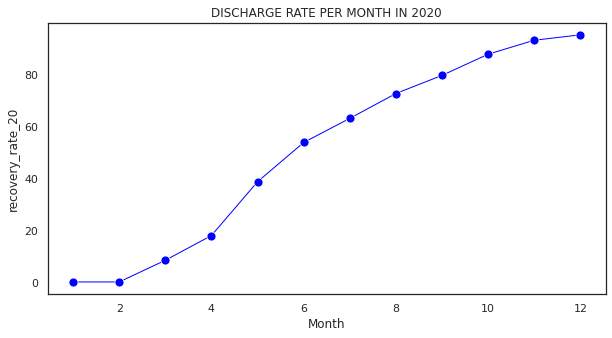

In [128]:
#plotting the figure for the discharge rate in the year 2020 per month
plt.figure(figsize=(10,5)) #Giving the fig size
sns.lineplot(x="Month",y="recovery_rate_20",data=data_20,color="b",lw=1,marker='o',markersize=9) #plotting the line plot for discharge rate pe rmonth
plt.title('DISCHARGE RATE PER MONTH IN 2020')
plt.show()

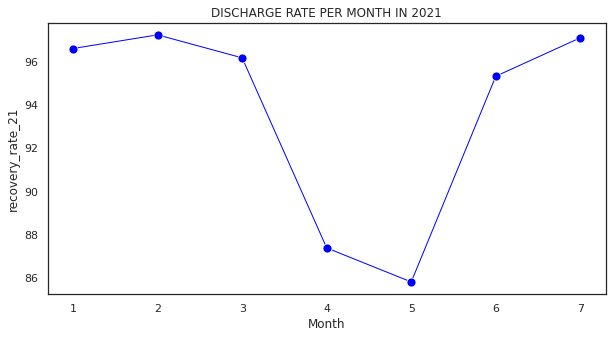

In [129]:
#plotting the figure for the discharge rate in the year 2021 per month
plt.figure(figsize=(10,5)) #Giving the fig size
sns.lineplot(x="Month",y="recovery_rate_21",data=data_21,color="b",lw=1,marker='o',markersize=9) #plotting the line plot for discharge rate permonth
plt.title('DISCHARGE RATE PER MONTH IN 2021')
plt.show()

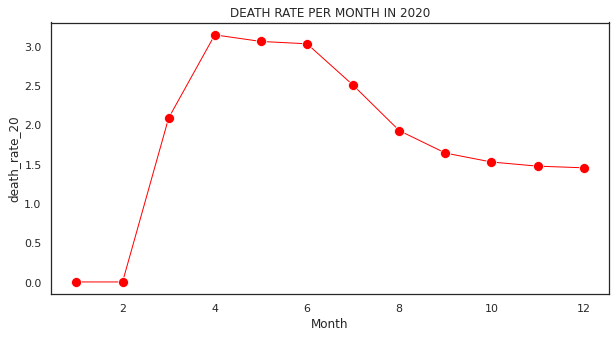

In [130]:
#plotting the figure for the death rate in the year 2020 per month
plt.figure(figsize=(10,5)) #Giving the fig size
sns.lineplot(x="Month",y="death_rate_20",data=data_20,color="r",lw=1,marker='o',markersize=10) #plotting the line plot for death rate permonth
plt.title('DEATH RATE PER MONTH IN 2020')
plt.show()

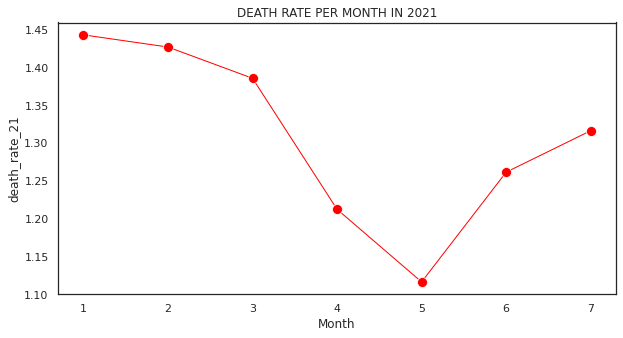

In [131]:
#plotting the figure for the death rate in the year 2021 per month
plt.figure(figsize=(10,5)) #Giving the fig size
sns.lineplot(x="Month",y="death_rate_21",data=data_21,color="r",lw=1,marker='o',markersize=10) #plotting the line plot for death rate permonth
plt.title('DEATH RATE PER MONTH IN 2021')
plt.show()

In [110]:
# printing the total no.of active cases and grouping them statewise and sorting them
print('Total number of Active Covid-19 cases across India : {}'.format(max_confirmed_cases['Active_cases'].sum()))
Active_cases = confirmed_cases.groupby('States')['Active_cases'].min().sort_values(ascending=False).to_frame() #taking active cases and grouping them by states
Active_cases.style.background_gradient(cmap='Reds') 

Total number of Active Covid-19 cases across India : 356015


,Active_cases
States,
Maharashtra,117536
Kerala,104577
Karnataka,40039
Tamil Nadu,34477
Andhra Pradesh,33230
Odisha,25525
Assam,24244
West Bengal,17275
Telangana,11455


In [132]:
##FORECASTING##
#creating instances for forecast from country data
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index() #total confirmed cases and grouping them by date and setting an index for it
recovered = df.groupby('Date').sum()['Cured'].reset_index() #total cured cases and grouping them by date and setting an index for it
deaths = df.groupby('Date').sum()['Deaths'].reset_index() #total Deaths cases and grouping them by date and setting an index for it

In [133]:
confirmed.columns = ['ds', 'y'] #chaniging the colums of the data of confirmed cases as they are used ffor prohpet library
confirmed['ds'] = pd.to_datetime(confirmed['ds']) #formatting the date to year month date
#here we will use the prohpet library which is helpul fast and automated forcasts
m = Prophet(interval_width=0.5) # Interval width is 0.95 uncertainity
m.fit(confirmed) #giving the confirmed data as the input
future = m.make_future_dataframe(periods=20) #Making data frames for period of 20 days after 7th july
forecast = m.predict(future) #predicting the future 
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()   #predicting a range in between y_hat and y_hat upper and y_hat lower(uncertainities)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
540,2021-07-23,3.729806e+07,3.684726e+07,3.779637e+07
541,2021-07-24,3.750858e+07,3.705046e+07,3.800614e+07
542,2021-07-25,3.771859e+07,3.722568e+07,3.823541e+07
543,2021-07-26,3.792611e+07,3.737834e+07,3.842829e+07
544,2021-07-27,3.812740e+07,3.764654e+07,3.864336e+07


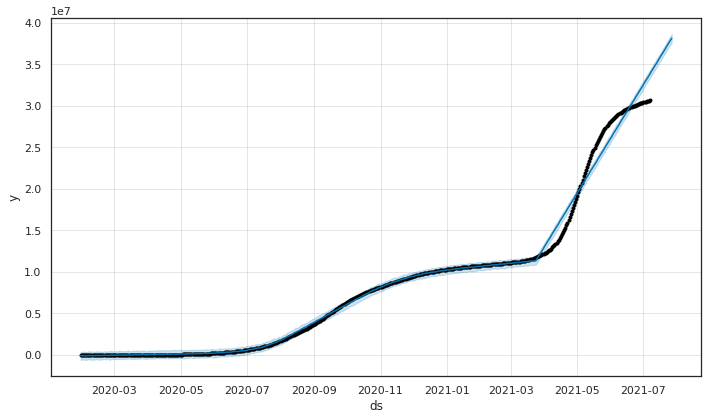

In [134]:
#we will plot the abover fore cast
confirmed_cases_forecast = m.plot(forecast)  #plotting the forecast of confirmed cases

In [135]:
#RECOVERY
print('Average recovery rate Covid-19 cases across India : {}'.format(confirmed_cases['Recovery_Rate'].mean()))#printig the total Recoverd rate in india
cases = confirmed_cases.groupby('States')['Recovery_Rate'].max().sort_values(ascending=False).to_frame()#printing state wise discharge rate in srted order
cases.style.background_gradient(cmap='Blues')#making the gradient as blue

Average recovery rate Covid-19 cases across India : 96.18701944444445


,Recovery_Rate
States,
Dadra and Nagar Haveli and Daman and Diu,99.593400
Rajasthan,98.955300
Madhya Pradesh,98.802100
Haryana,98.623200
Uttar Pradesh,98.553600
Chandigarh,98.518300
Gujarat,98.511500
Bihar,98.501100
Jharkhand,98.360600


In [136]:
#Taking the Discharging rate
Recovery_rate = df[['Date','Recovery_Rate']]
Recovery_rate.columns = ['ds', 'y']
Recovery_rate['ds'] = pd.to_datetime(Recovery_rate['ds'])
m = Prophet(interval_width=0.50)
m.fit(Recovery_rate)
future = m.make_future_dataframe(periods=20)       #Making data frames for period of 20 days after 7th july
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail() #Getting the forecast data

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
540,2021-07-23,91.465309,82.288646,101.152926
541,2021-07-24,91.448412,82.586079,100.130516
542,2021-07-25,91.615468,81.891525,100.673859
543,2021-07-26,91.657373,82.866738,100.977857
544,2021-07-27,91.749675,82.868965,101.939134


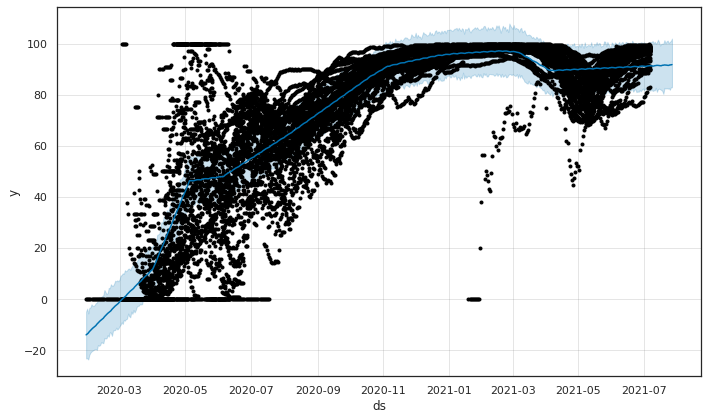

In [137]:
Recovery_forecast = m.plot(forecast)

In [138]:
print('Average recovery rate Covid-19 cases across India : {}'.format(confirmed_cases['Death_Rate'].mean()))#printig the total Discharge rate in india
top_cases = confirmed_cases.groupby('States')['Death_Rate'].max().sort_values(ascending=False).to_frame()#printing state wise discharge rate in srted order
top_cases.style.background_gradient(cmap='flare') #gradient as flare

Average recovery rate Covid-19 cases across India : 1.254216666666667


,Death_Rate
States,
Punjab,2.703200
Uttarakhand,2.152700
Maharashtra,2.020700
Nagaland,1.963400
Goa,1.834700
Delhi,1.742600
Himachal Pradesh,1.717200
Andaman and Nicobar Islands,1.709600
Meghalaya,1.680700


In [139]:
death_rate = df[['Date','Death_Rate']] #same as confirmed,discharge rate
death_rate.columns = ['ds', 'y']
death_rate['ds'] = pd.to_datetime(death_rate['ds'])
m = Prophet(interval_width=0.50)
m.fit(death_rate)
future = m.make_future_dataframe(periods=20)       #Making data frames for period of 20 days after 7th july
future.tail(10)
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
540,2021-07-23,1.237660,-0.024683,2.365437
541,2021-07-24,1.216226,0.124394,2.357830
542,2021-07-25,1.234584,0.041993,2.253379
543,2021-07-26,1.223542,0.154468,2.428431
544,2021-07-27,1.230894,0.082246,2.263596


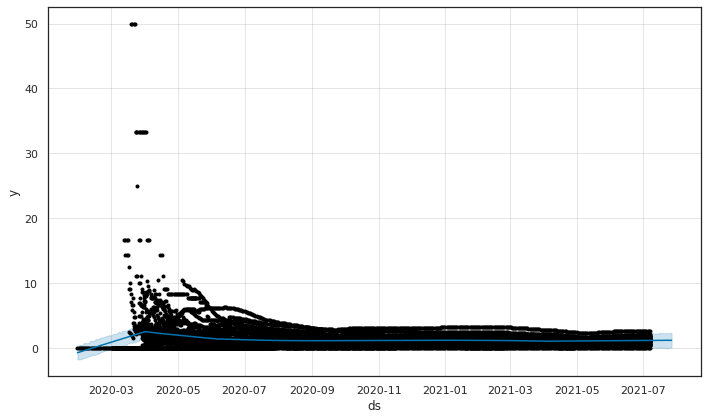

In [140]:
Death_forecast = m.plot(forecast)

In [141]:

#State-wise Report
#printing all the state wise data sort by confirmed
state_wise = confirmed_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='flare',subset=["Active_cases"])\
                        .background_gradient(cmap='RdYlBu',subset=["Death_Rate"])\
                        .background_gradient(cmap='Accent',subset=["Recovery_Rate"])

state_wise

,Date,Time,States,Cured,Deaths,Confirmed,Active_cases,Recovery_Rate,Death_Rate
16834,2021-07-07 00:00:00,8:00 AM,Maharashtra,5872268,123531,6113335,117536,96.056700,2.020700
16830,2021-07-07 00:00:00,8:00 AM,Kerala,2877557,13960,2996094,104577,96.043600,0.465900
16829,2021-07-07 00:00:00,8:00 AM,Karnataka,2784030,35526,2859595,40039,97.357500,1.242300
16844,2021-07-07 00:00:00,8:00 AM,Tamil Nadu,2435872,33132,2503481,34477,97.299400,1.323400
16815,2021-07-07 00:00:00,8:00 AM,Andhra Pradesh,1861937,12898,1908065,33230,97.582500,0.676000
16848,2021-07-07 00:00:00,8:00 AM,Uttar Pradesh,1682130,22656,1706818,2032,98.553600,1.327400
16849,2021-07-07 00:00:00,8:00 AM,West Bengal,1472132,17834,1507241,17275,97.670600,1.183200
16822,2021-07-07 00:00:00,8:00 AM,Delhi,1408853,25001,1434687,833,98.199300,1.742600
16820,2021-07-07 00:00:00,8:00 AM,Chhattisgarh,977893,13462,996359,5004,98.146700,1.351100
16842,2021-07-07 00:00:00,8:00 AM,Rajasthan,942882,8942,952836,1012,98.955300,0.938500


In [142]:
#vaccine data sample
#changing the columns and removing the spaces in between them
vaccine_df = vaccine_df[['Updated On','State','Total Doses Administered','Total Sessions Conducted','First Dose Administered','Second Dose Administered','Male(Individuals Vaccinated)','Female(Individuals Vaccinated)','Transgender(Individuals Vaccinated)','Total Covaxin Administered','Total CoviShield Administered','Total Sputnik V Administered','18-45 years (Age)','45-60 years (Age)','60+ years (Age)','Total Individuals Vaccinated']]
vaccine_df.columns = ['Date','States','Total_Doses_Administered','Total_Sessions_Conducted','First_Dose_Administered','Second_Dose_Administered','Male_Vaccinated','Female_Vaccinated','Transgender_Vaccinated','Total_Covaxin_Administered','Total_CoviShield_Administered','Total_SputnikV_Administered','18-45_Years','45-60_Years','60+_Years','Total_Individuals_Vaccinated']
vaccine_df.head()

,Date,States,Total_Doses_Administered,Total_Sessions_Conducted,First_Dose_Administered,Second_Dose_Administered,Male_Vaccinated,Female_Vaccinated,Transgender_Vaccinated,Total_Covaxin_Administered,Total_CoviShield_Administered,Total_SputnikV_Administered,18-45_Years,45-60_Years,60+_Years,Total_Individuals_Vaccinated
0,16/01/2021,India,48276.0,3455.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,251280.0


In [143]:
vaccine_df.isnull().sum() # checking for the null values

Date                                0
States                              0
Total_Doses_Administered          335
Total_Sessions_Conducted          336
First_Dose_Administered           336
Second_Dose_Administered          336
Male_Vaccinated                   336
Female_Vaccinated                 336
Transgender_Vaccinated            336
Total_Covaxin_Administered        336
Total_CoviShield_Administered     336
Total_SputnikV_Administered      4962
18-45_Years                      2522
45-60_Years                      2521
60+_Years                        2521
Total_Individuals_Vaccinated      336
dtype: int64

In [144]:

vaccine_df = vaccine_df.drop(['Total_SputnikV_Administered','18-45_Years','45-60_Years','60+_Years'], axis=1)
# removing columns having most null values

In [65]:
male = vaccine_df['Male_Vaccinated'].sum() 
female = vaccine_df['Female_Vaccinated'].sum()  
trans = vaccine_df['Transgender_Vaccinated'].sum()
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],title="Male and Female Vaccinated ratio for Covid19")

In [145]:
Covaxin = vaccine_df["Total_Covaxin_Administered"].sum() 
Covishield = vaccine_df["Total_CoviShield_Administered"].sum()  
px.pie(names=["Covaxin Vaccinated","Covishield Vaccinated"],values=[Covaxin,Covishield],title="Covaxin and Covishield Vaccination")

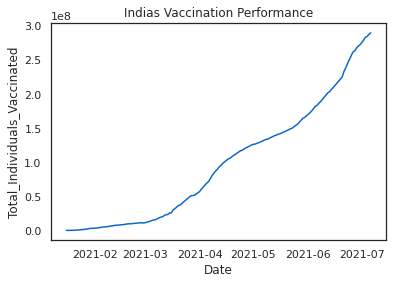

In [146]:
#plotting of the indias vaccination performance
vaccine_df = vaccine_df[vaccine_df['Total_Individuals_Vaccinated'].notna()]  # Here notna detects existing/ non-missing values in the dataframe. The function returns a boolean object having the same size as that of the object on which it is applied, indicating whether each individual value is a na value or not.
vaccine_df['Date'] = pd.to_datetime(vaccine_df['Date'], format = '%d/%m/%Y') #Making the date in the format of %d %m %Y
sns.lineplot(data=vaccine_df[vaccine_df['States']=='India'], x='Date', y='Total_Individuals_Vaccinated')
plt.title('Indias Vaccination Performance')
plt.show()